In [1]:
from clustering import MeanShift
from clustering import KMeans
from clustering import MiniBatchKMeans

from utils import generate_random
from utils import plot

import numpy as np

/home/patrik/Envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data = generate_random()

## Mean Shift

To apply clustering to a data, a cluster object has to be created, which is in this case a MeanShift instance. By invoking the object's fit method with the data (2D Numpy array) as parameter, the returned value will be the indexes of the clusters for the data points in the same order as it was provided in the input parameter.

INFO:tensorflow:Clustering finished in 30 iterations with 8.1097e-06 shift delta.
INFO:tensorflow:Proceeding to post-processing.


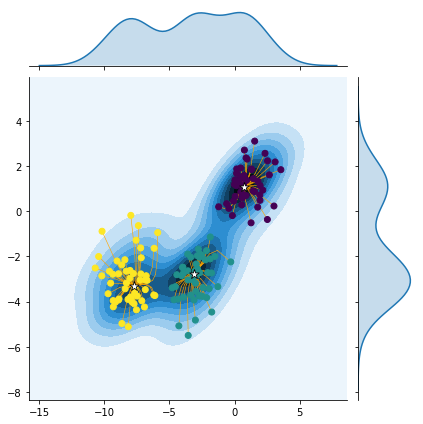

In [7]:
# available kernels are [gaussian, epanechnikov, uniform]
# to define a new kernel, see clustering.py MeanShift class definition.

ms = MeanShift(kernel='gaussian', bandwidth=1)
labels = ms.fit(data)

plot(ms.history, data, labels, ms.centroids)

To assign a cluster to new data point(s), the cluster object's predict method can be used. It will calculate the nearest centroid for each entry and return the labels, analogously to the fit method.

In [9]:
x = np.array([[-10, -10], [-3, -3], [2, 2]])
ms.predict(x)

array([2, 1, 0], dtype=int32)

## K-Means

INFO:tensorflow:Clustering finished in 3 iterations with 0.0 shift delta.
INFO:tensorflow:Proceeding to post-processing.


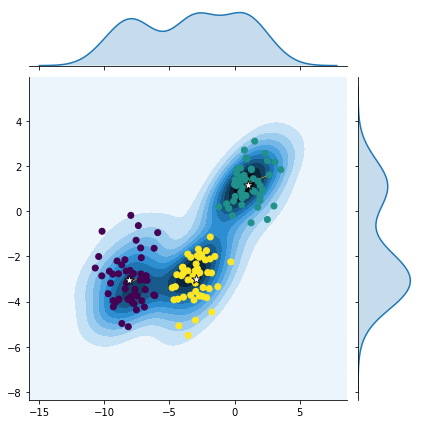

In [5]:
ms = KMeans(n_clusters=3)
labels = ms.fit(data)

plot(ms.history, data, labels, ms.centroids)

## Mini Batch K-Means

INFO:tensorflow:Clustering finished in 4999 iterations with 0.52639 shift delta.
INFO:tensorflow:Proceeding to post-processing.


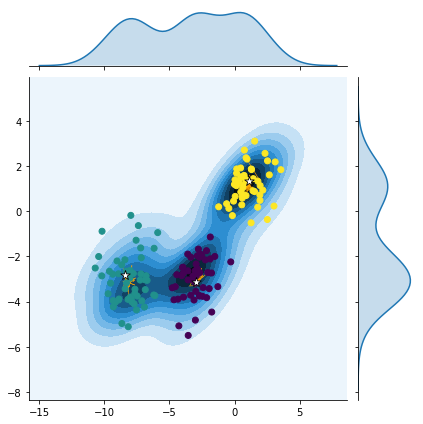

In [6]:
ms = MiniBatchKMeans(n_clusters=3, batch_size=50)
labels = ms.fit(data)

plot(ms.history, data, labels, ms.centroids)